# Import Library

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import seaborn as sns

from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [2]:
df = pd.read_csv("./games.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# check missing values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Preprocessing

### Column name 

In [6]:
# column name
# df = df.rename(columns = {"Name" : "name", })
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## handle missing values

In [7]:
# name
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df = df.dropna(subset=['name'], axis=0)
df = df.reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
# year of release
df[df.year_of_release.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [11]:
# check median year_of_release per platform
median_year_platform = df.groupby('platform')['year_of_release'].median()
median_year_platform['GBA']

2003.0

In [12]:
median_year_platform

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [13]:
# impute and convert missing values
df['year_of_release'] = df.apply(lambda x: median_year_platform[x.platform] if 
                                 pd.isna(x.year_of_release) else x.year_of_release, axis=1)

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [15]:
df.loc[183, 'name']

'Madden NFL 2004'

In [16]:
df.iloc[183, 0]

'Madden NFL 2004'

In [17]:
# ubah tipe data year_of_release
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [19]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
# isi missing value kolom user_score berdasarkan platform dan genre
# atau kita bisa biarkan nan menjadi nan

In [22]:
# convert user_score to numeric
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

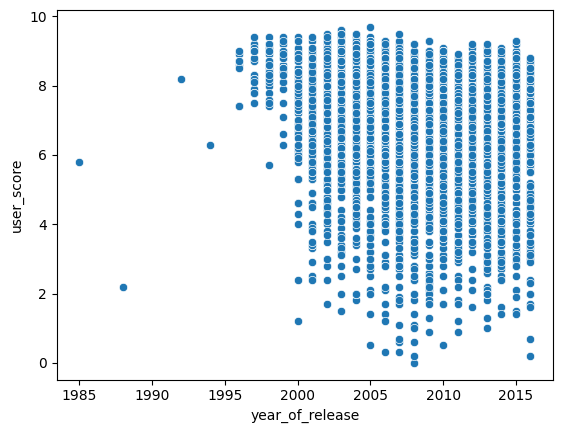

<AxesSubplot: xlabel='user_score', ylabel='year_of_release'>

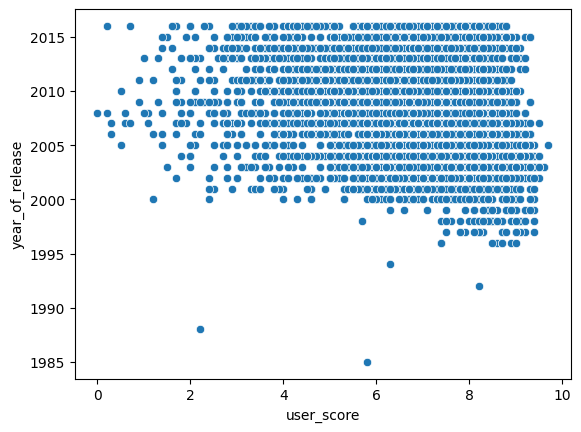

In [23]:
sns.scatterplot(data = df, x='year_of_release', y='user_score')
plt.show()
sns.scatterplot(data = df, x='user_score', y='year_of_release')

In [24]:
def buat_grafik(x, y):
    sns.scatterplot(data = df, x=x, y=y)
    plt.show()

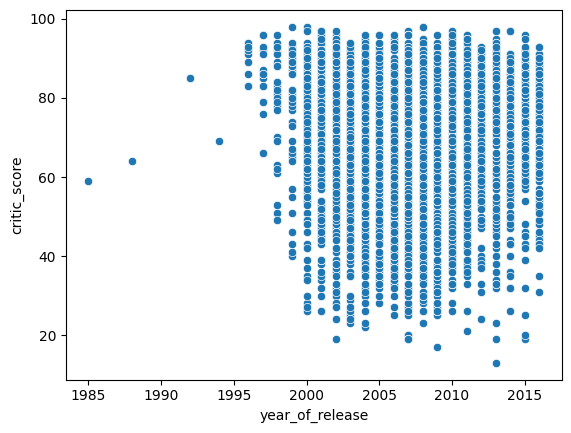

In [25]:
buat_grafik('year_of_release', 'critic_score')

<AxesSubplot: xlabel='user_score', ylabel='year_of_release'>

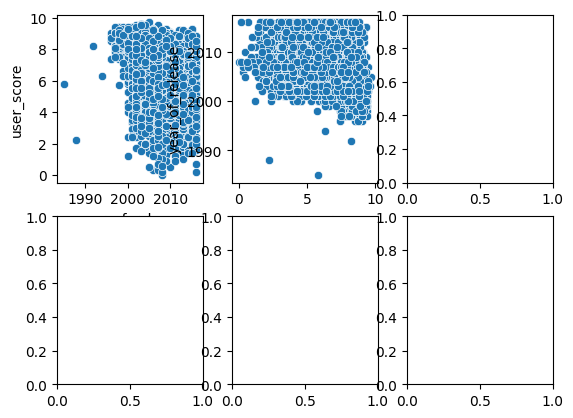

In [26]:
fig , axes = plt.subplots(2,3) #artinya satu baris dua kolom
sns.scatterplot(data = df, x='year_of_release', y='user_score', ax=axes[0][0])
sns.scatterplot(data = df, x='user_score', y='year_of_release', ax=axes[0][1])

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [28]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Analisis data

array([[<AxesSubplot: title={'center': 'year_of_release'}>]], dtype=object)

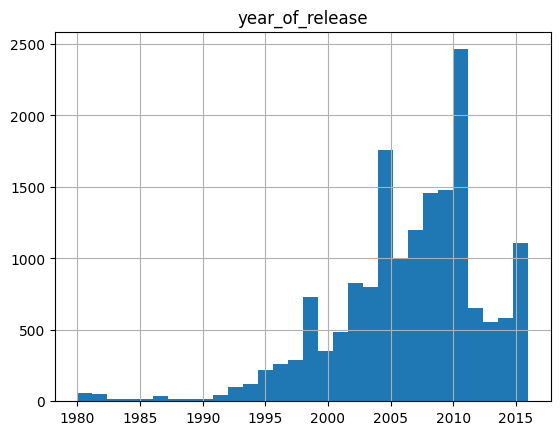

In [29]:
df.hist('year_of_release', bins=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

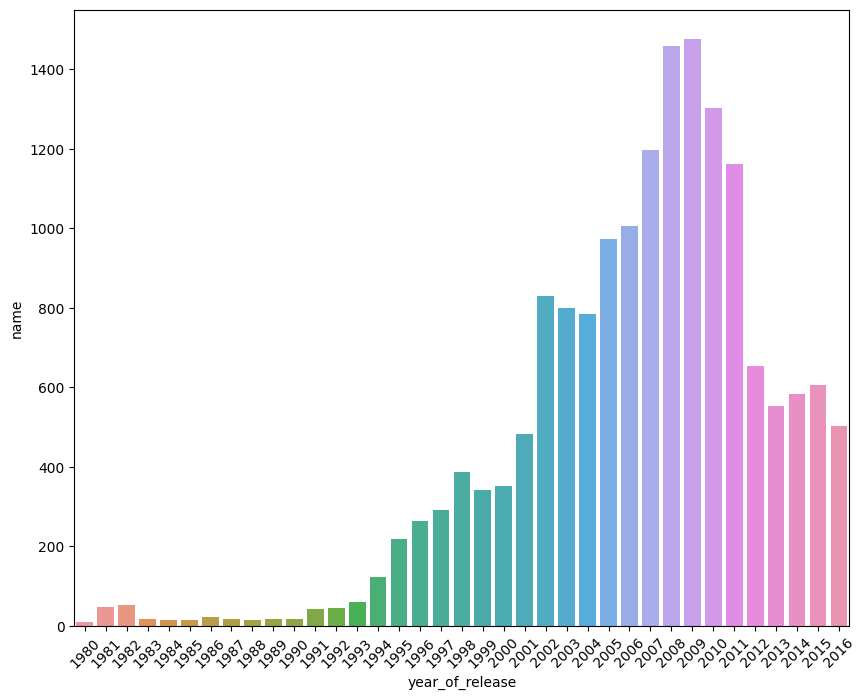

In [30]:
game_per_year = df.groupby('year_of_release')['name'].count().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = game_per_year, x='year_of_release', y='name')
plt.xticks(rotation=45)


<AxesSubplot: xlabel='platform'>

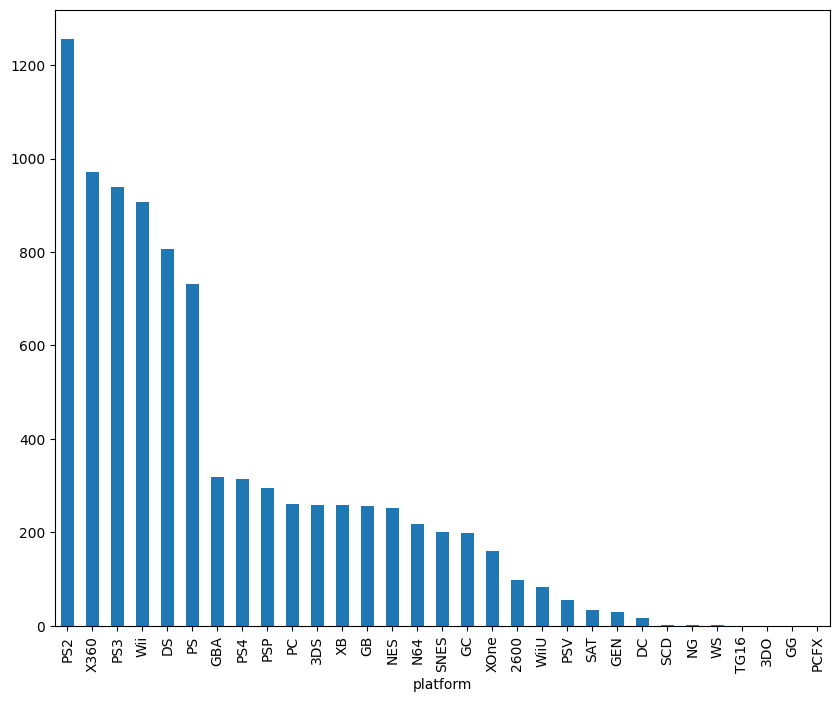

In [31]:
# penjualan per platform
plt.figure(figsize=(10,8))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

In [32]:
# cek penjualan per tahun untuk ps2, x360, ps3, wii, ds
def sales_per_platform(data, platform):
    df_filter = data[data['platform'] == platform]
    df_filter.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')

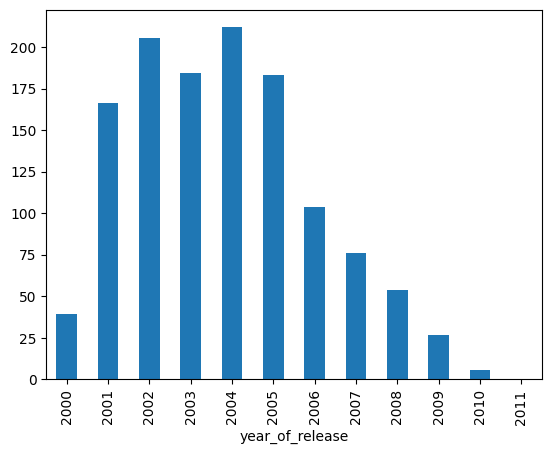

In [33]:
sales_per_platform(df, 'PS2')

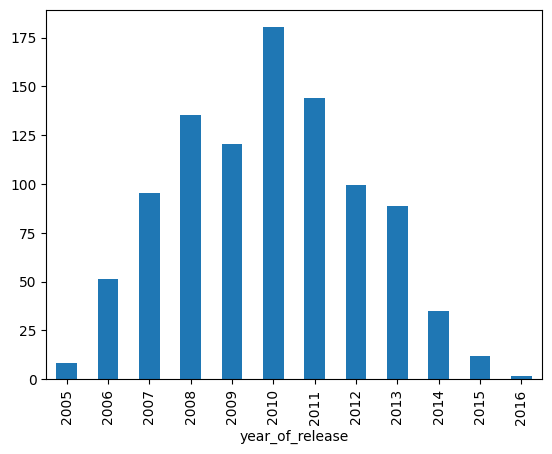

In [34]:
sales_per_platform(df, 'X360')

In [35]:
# saya ambil dari tahun 2012 saja datanya
df_final = df[df['year_of_release'] >= 2012]
df_final.shape

(2895, 12)

<AxesSubplot: xlabel='platform'>

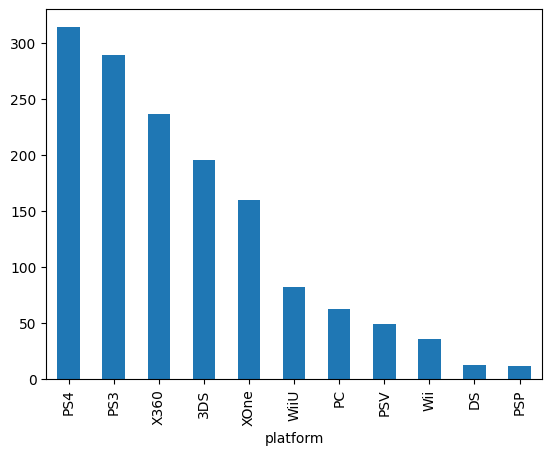

In [36]:
# penjualan per platform
df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

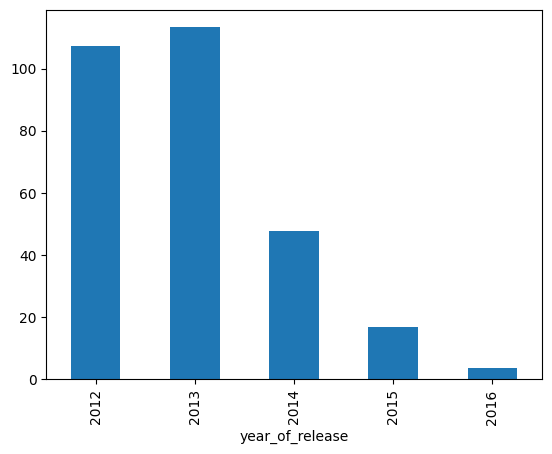

In [37]:
sales_per_platform(df_final, 'PS3')

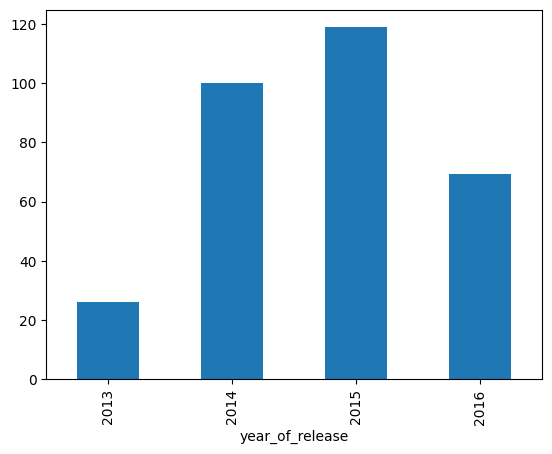

In [38]:
sales_per_platform(df_final, 'PS4')

## with annotate

In [66]:
def sales_per_platform(data, platform):
    df_filter = data[data['platform'] == platform]
    bars = df_filter.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    return bar

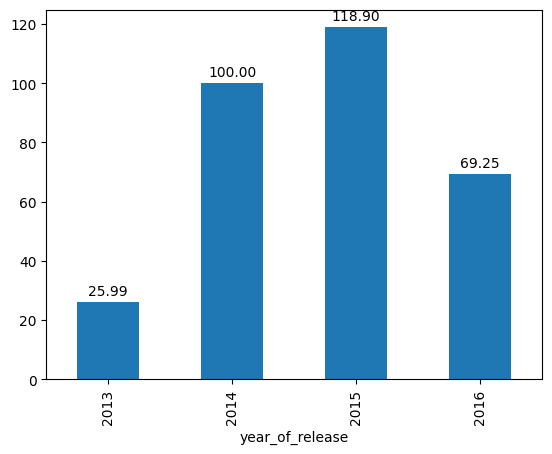

In [69]:
sales_per_platform(df_final, 'PS4')

In [84]:
graph_by_platform = df_final.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')\
                    .reset_index()
graph_by_platform.head()

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,57.76
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


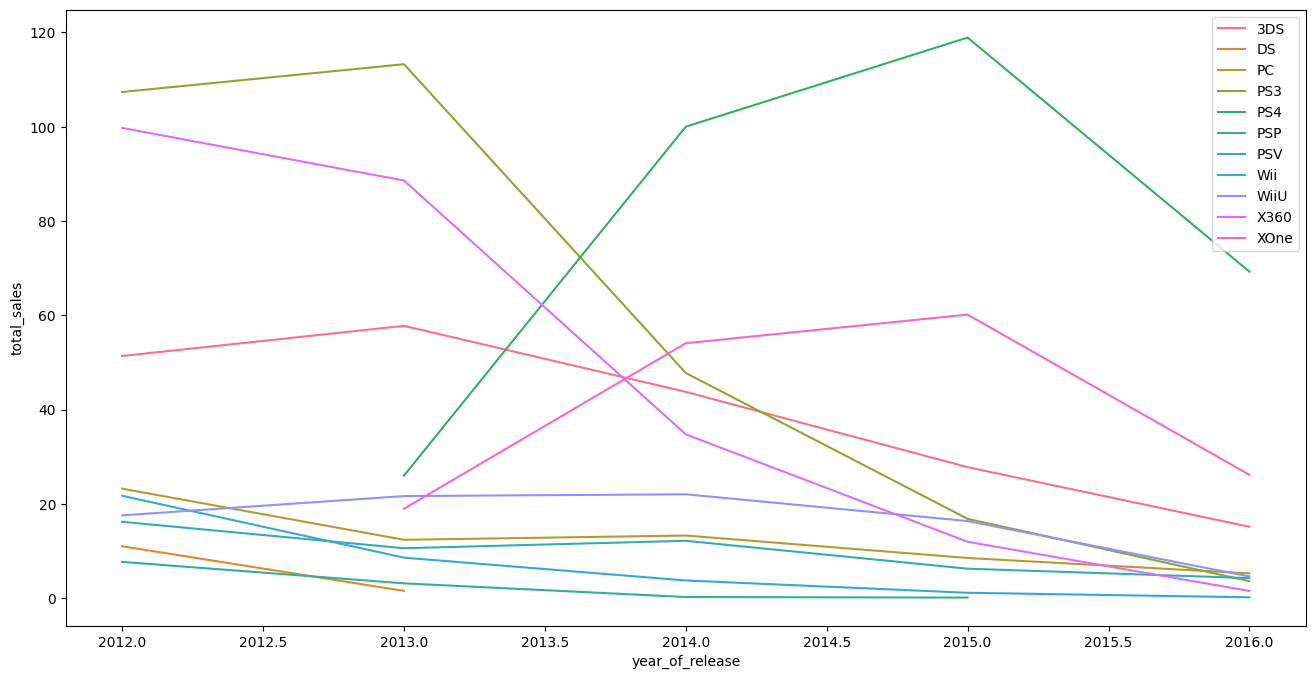

In [83]:
plt.subplots(figsize= (16, 8))
sns.lineplot(data = graph_by_platform, x = 'year_of_release', y = 'total_sales', hue='platform')
plt.legend(loc = 0)

In [39]:
df_top_platforms = df_final[df_final['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
df_top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [40]:
# for platform in ['PS2', 'PS3', 'XBOX_ONE'] :
#     df_temp = df.loc[df['platform']==platform]
#     plot_df_temp = df_temp .groupby('year_of_release')['total_sales'].agg('sum').reset_index().sort_values(by ='year_of_release', ascending=True)
#     plot_df_temp.plot(kind='bar', x='year_of_release', y='total_sales')

<AxesSubplot: xlabel='platform', ylabel='total_sales'>

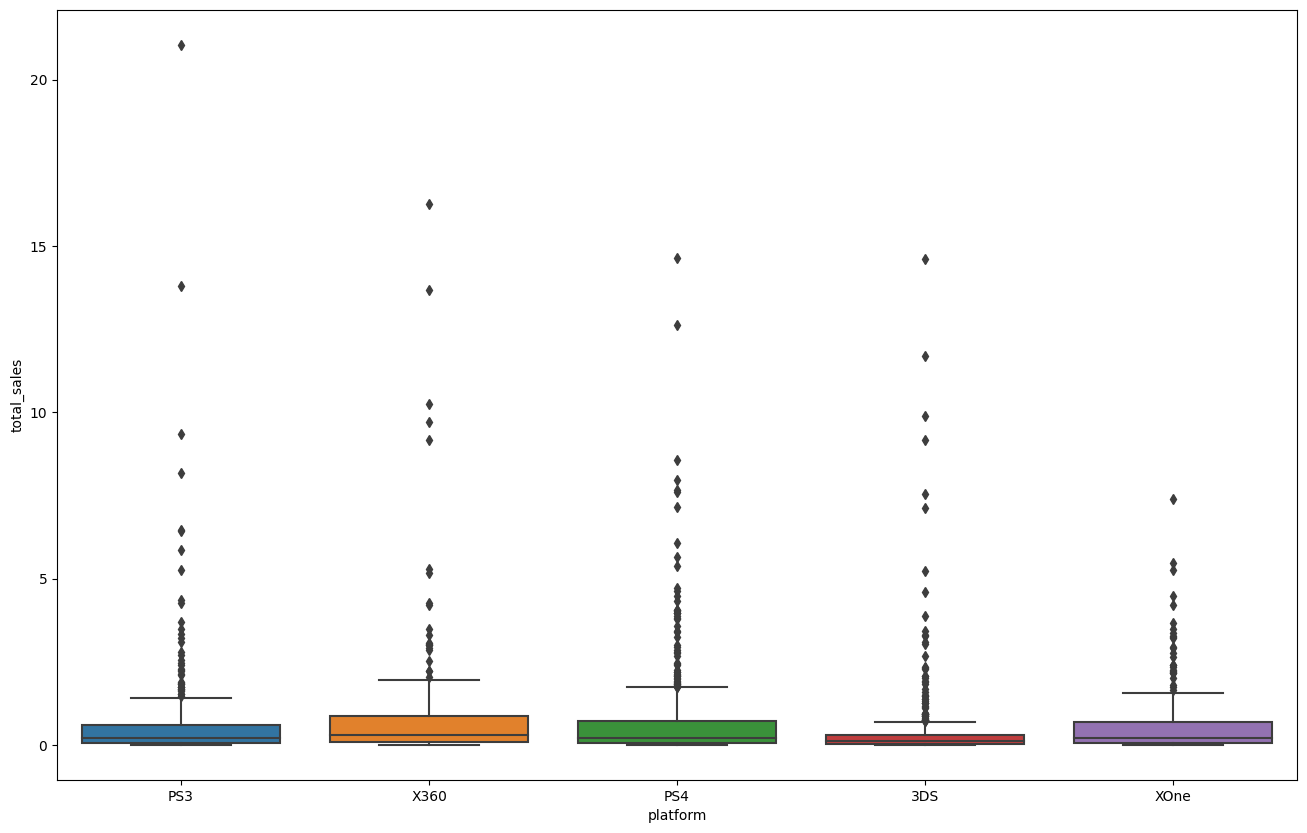

In [41]:
plt.figure(figsize=(16,10))
# df_top_platforms.boxplot(by='platform', column='total_sales')
sns.boxplot(data = df_top_platforms, x='platform', y='total_sales')

In [42]:
# pivot table untuk cek median dan mean total_sales berdasarkan platform
df_top_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['median','mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,0.11,0.484653
PS3,0.20,0.585781
PS4,0.20,0.801378
X360,0.31,0.810068
XOne,0.22,0.645020


In [43]:
x_360 = df_final[df_final['platform'] == 'X360']
x_360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16448,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16458,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16489,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16611,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


<AxesSubplot: xlabel='user_score', ylabel='total_sales'>

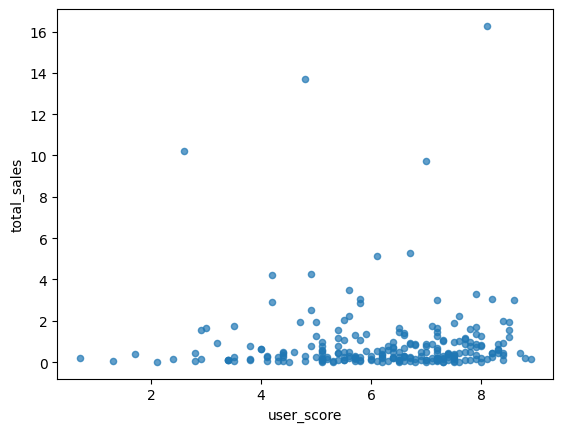

In [44]:
x_360.plot.scatter(y='total_sales', x='user_score', alpha=.7)

<AxesSubplot: xlabel='critic_score', ylabel='total_sales'>

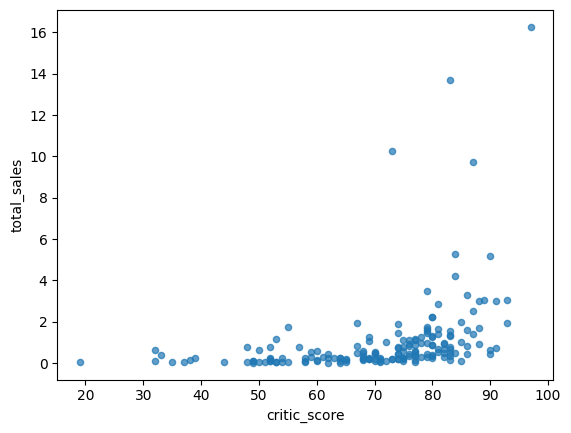

In [45]:
x_360.plot.scatter(y='total_sales', x='critic_score', alpha=.7)

In [46]:
# bikin pivot_table indexnya (name, platform) kemudian buat barplot untuk cek penjualan game yang ada di multiple platform

In [47]:
df_final[df_final['name'] == 'Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1729,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [48]:
# game distribution berdasasrkan genre

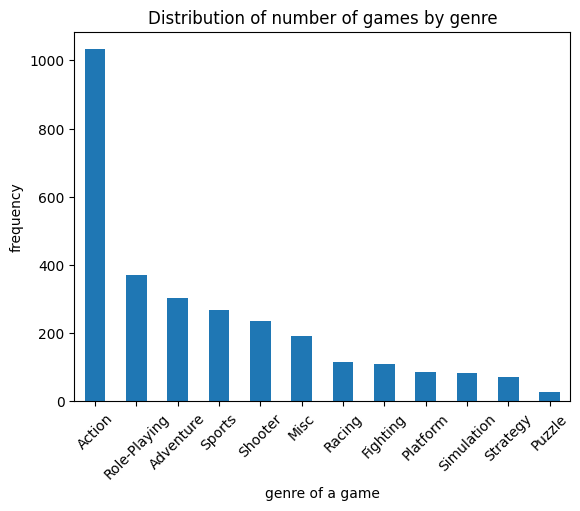

In [49]:
df_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of number of games by genre')
plt.xlabel('genre of a game')
plt.xticks(rotation=45)
plt.ylabel('frequency');

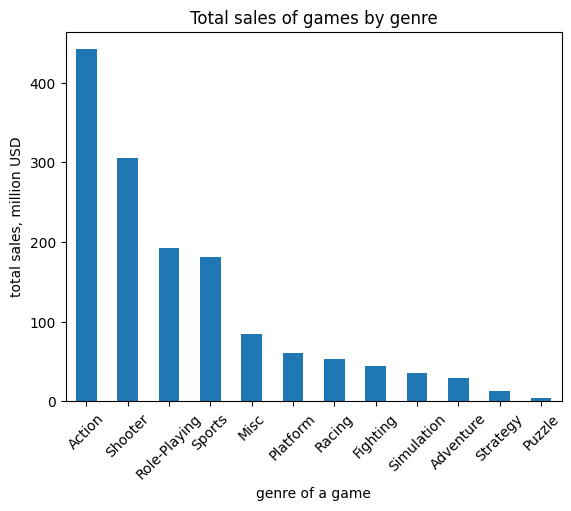

In [50]:
df_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total sales of games by genre')
plt.xlabel('genre of a game')
plt.xticks(rotation=45)
plt.ylabel('total sales, million USD');

In [51]:
# NA
def sales_platform_area(area):
    df_1 = df_final.groupby('platform')[area].sum().reset_index().sort_values(by=area,ascending=False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum()) * 100
    return df_1.head()

In [52]:
# NA
cek_na = sales_platform_area('na_sales')
cek_na

,platform,na_sales,market_share
9,X360,140.05,23.660292
4,PS4,108.74,18.370726
3,PS3,103.38,17.465198
10,XOne,93.12,15.731856
0,3DS,56.15,9.486079


In [53]:
# EU
cek_eu = sales_platform_area('eu_sales')
cek_eu

,platform,eu_sales,market_share
4,PS4,141.09,27.824012
3,PS3,106.86,21.073598
9,X360,74.52,14.695906
10,XOne,51.59,10.173937
0,3DS,42.85,8.450343


In [54]:
# JP
cek_jp = sales_platform_area('jp_sales')
cek_jp

,platform,jp_sales,market_share
0,3DS,87.84,45.583809
3,PS3,35.29,18.313441
6,PSV,21.11,10.954852
4,PS4,15.96,8.282304
8,WiiU,13.01,6.751427


In [55]:
def sales_genre_area(area):
    df_1 = df_final.groupby('genre')[area].sum().reset_index().sort_values(by=area,ascending=False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum()) * 100
    return df_1.head()

In [56]:
# NA
cek_na_genre = sales_genre_area('na_sales')
cek_na_genre

,genre,na_sales,market_share
0,Action,178.02,30.075010
8,Shooter,144.81,24.464455
10,Sports,81.53,13.773821
7,Role-Playing,64.11,10.830856
3,Misc,38.19,6.451885


In [57]:
# EU
cek_eu_genre = sales_genre_area('eu_sales')
cek_eu_genre

,genre,eu_sales,market_share
0,Action,159.53,31.460519
8,Shooter,113.49,22.381084
10,Sports,69.09,13.625069
7,Role-Playing,48.58,9.580342
6,Racing,27.29,5.381794


In [58]:
# JP
cek_jp_genre = sales_genre_area('jp_sales')
cek_jp_genre

,genre,jp_sales,market_share
7,Role-Playing,65.54,34.011417
0,Action,52.80,27.400104
3,Misc,12.86,6.673586
9,Simulation,10.41,5.402180
2,Fighting,9.44,4.898806


In [59]:
# group by rating kemudian bandingkan tiap region

- Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda.

1. tentukan H0 dan H1
2. tentukan alpha, default nilai alpha 5%
3. lakukan uji statistik (student t-test independent 2 sampel)
4. bandingkan p-value hasil uji statistik dengan nilai alpha

In [60]:
# di kolom user_score masih ada missing value

In [61]:
sample_1 = df_final[df_final['platform'] == 'XOne'].dropna()['user_score']
sample_2 = df_final[df_final['platform'] == 'PC'].dropna()['user_score']

In [62]:
sample_1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16262    8.1
16312    3.1
16390    6.3
16595    6.0
16628    8.2
Name: user_score, Length: 159, dtype: float64

In [63]:
sample_2

192      4.0
458      3.9
687      7.9
958      4.8
1094     7.9
        ... 
16278    7.3
16461    6.8
16507    7.9
16582    7.9
16690    7.6
Name: user_score, Length: 174, dtype: float64

In [64]:
ttest_ind(sample_1, sample_2)

NameError: name 'ttest_ind' is not defined

In [150]:
sources = [
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/23952d267c804f6baac22e90f05ea4b5/download/Data-Penumpang-Bus-Transjakarta-Januari-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/0ea73ccc6122e5d12a6b85df0f57b1f5/download/Data-Penumpang-Bus-Transjakarta-Februari-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/675046b75b56227d99e6ea026e8becb5/download/Data-Penumpang-Bus-Transjakarta-Maret-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/4a19b2ba15b6e3f8573506c5b683f4c9/download/Data-Penumpang-Bus-Transjakarta-April-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/0c13102041732b94039bba7030917767/download/Data-Penumpang-Bus-Transjakarta-Mei-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/c4e860df3133e9630072bbaa6e0e3ee4/download/Data-Penumpang-Bus-Transjakarta-Juni-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/8d5de94489b50bc964039d72c12b424c/download/Data-Penumpang-Bus-Transjakarta-Juli-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/aab805f2cb05e97fb234c56ffa31a49e/download/Data-Penumpang-Bus-Transjakarta-Agustus-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/ce4c66b7ec75ee03654aaa8d0cd195cf/download/Data-Penumpang-Bus-Transjakarta-September-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/202ee80f8f06c7b16a3c9f134b8c2324/download/Data-Penumpang-Bus-Transjakarta-Oktober-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/7fc03773c05face467c1852cfadb5dad/download/Data-Penumpang-Bus-Transjakarta-November-2021.csv',
    'https://data.jakarta.go.id/dataset/14ab98731e79939ecaa26ee4222531d2/resource/9f1c2bb6164087f0f0c62b3451e24dd9/download/Data-Penumpang-Bus-Transjakarta-Desember-2021.csv'
]
df_penumpang=pd.DataFrame()
for x in sources:
    penumpang=pd.read_csv(x)
    df_penumpang=pd.concat([df_penumpang,penumpang])
penumpang_petrayek_perbulan=df_penumpang.groupby(['kode_trayek','bulan'])['jumlah_penumpang'].sum().reset_index()
rata2=penumpang_petrayek_perbulan['jumlah_penumpang'].mean()
print(f'Rata-rata jumlah penumpang per trayek perbulannya adalah {rata2}.')

Rata-rata jumlah penumpang per trayek perbulannya adalah 81675.86354378819.
